# Purpose

To perform exploratory data analysis of dataset provided by the  U.S. Office of Foreign Labor Certification website.The dataset used can be found here... 

### Context

When a U.S. company wants to hire someone from outside of the United States for a special tier or technical position, they have to file an application with the United States government to get a visa for the applicant so that the applicant is allowed to stay in the country. Typically, the company will either file a green card application, called the perm application, or a labor condition application, called an LCA.LCAs include other specialty working visas, like H-1B visas.


### Questions I asked myself before start performing analysis (highly random and used to boost curiosity)

- In what states the Software engineers,data scientists,data analysts earn most?
- What is the salary variations among different job profiles in different states?
- How many applications were accepted per job profile?
- Is there any pattern emerging for growing salaries among job profiles?
- What is the most applied visa categry?
- What is the variation in job profiles among different countries?
- What is the success ration of visa approvals?
 - Which country has max visa approvals ratio?


# PRIMARY DATA OPERATIONS (cleaning and filtering)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 

warnings.filterwarnings('ignore') # this is used to ignore the warnings in the output

#importing file
path = 'C:\\Users\\Vivek\\Desktop\\PythonPrograms\\salary_data.xlsx'
dataset= pd.read_excel(path)

# this function is created to get rid of using info and head command on any dataset repeatedly
def data_basics(data):
    import pandas as pd
    head=data.head()
    info=print(data.info(),end='\n\n\n')
    return head, info


In [2]:

dic={'WA':'WASHINGTON','CA':'CALIFORNIA','CO':'COLORADO','TX':'TEXAS','AL':'ALABAMA','NC':'NORTH CAROLINA','NY':'NEW YORK',\
     'MA':'MASSACHUSETTS','ME':'MAINE'}

# refining state names by replacing abbreviations with full name of required set from 'WORK_STATE' column
dataset['WORK_STATE']= dataset.WORK_STATE.replace( {'WA':'WASHINGTON','CA':'CALIFORNIA','CO':'COLORADO','TX':'TEXAS',\
                                                    'AL':'ALABAMA','NC':'NORTH CAROLINA','NY':'NEW YORK','MA':'MASSACHUSETTS',\
                                                    'ME':'MAINE'})

In [3]:
# we are concerned about few states, where we want to analyse jobs related information
state=['NEW YORK','WASHINGTON','CALIFORNIA','COLORADO','TEXAS','ALABAMA','NORTH CAROLINA','MASSACHUSETTS','MAINE']

left_states=[]
for word in dataset.WORK_STATE:
    if word not in state:
        left_states.append(word)

dataset['WORK_STATE']= dataset.WORK_STATE.replace(left_states,'OTHERS')

In [4]:
# Converting selelctive columns dtype to 'category' for better grouping

lis=['COUNTRY_OF_CITIZENSHIP','VISA_CLASS','JOB_TITLE_SUBGROUP','FULL_TIME_POSITION_Y_N','EXPERIENCE_REQUIRED_Y_N',\
     'EDUCATION_LEVEL_REQUIRED','PAID_WAGE_SUBMITTED_UNIT','CASE_STATUS','WORK_STATE']
for word in lis:
    
    dataset[word]=dataset[word].astype('category')
      

In [23]:
# Slicing dataset into sub dataset that serves columns only to perform salary based analysis

salary_columns= [ 'JOB_TITLE_SUBGROUP','JOB_TITLE','PREVAILING_WAGE_SUBMITTED','PREVAILING_WAGE_SUBMITTED_UNIT',\
                 'PAID_WAGE_SUBMITTED','PAID_WAGE_SUBMITTED_UNIT','PAID_WAGE_PER_YEAR','FULL_TIME_POSITION_Y_N','WORK_STATE',\
                 'VISA_CLASS']

salary = dataset.loc[:,salary_columns]


In [71]:
data_basics(salary)

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 167278 entries, software engineer to teacher
Data columns (total 8 columns):
JOB_TITLE                         167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null category
PAID_WAGE_PER_YEAR                167278 non-null float64
FULL_TIME_POSITION_Y_N            156185 non-null category
WORK_STATE                        167278 non-null category
dtypes: category(3), float64(3), object(2)
memory usage: 7.0+ MB
None




(                                            JOB_TITLE  \
 JOB_TITLE_SUBGROUP                                      
 software engineer                   SOFTWARE ENGINEER   
 assistant professor  Assistant Professor of Marketing   
 teacher                     SPECIAL EDUCATION TEACHER   
 teacher                               SCIENCE TEACHER   
 software engineer            SENIOR SOFTWARE ENGINEER   
 
                      PREVAILING_WAGE_SUBMITTED PREVAILING_WAGE_SUBMITTED_UNIT  \
 JOB_TITLE_SUBGROUP                                                              
 software engineer                    6217100.0                           year   
 assistant professor                  5067600.0                           year   
 teacher                              4947000.0                           year   
 teacher                               251052.0                          month   
 software engineer                      84573.0                      bi-weekly   
 
                

---

# Data visualization

In [6]:
#Setting up the default figure size
sns.set(rc={'figure.figsize':(7,4)},style='white')

# salaries of data related rows

### BAR PLOTS variations

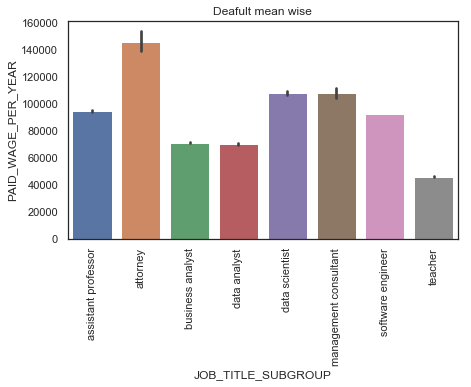

In [8]:
# prevaling wage difference and paid wage difference yearly 
# MEAN is the statistical method used to see variation

mean_salary_job_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,)
plt.xticks(rotation=90)
plt.title('Deafult mean wise')
plt.show()

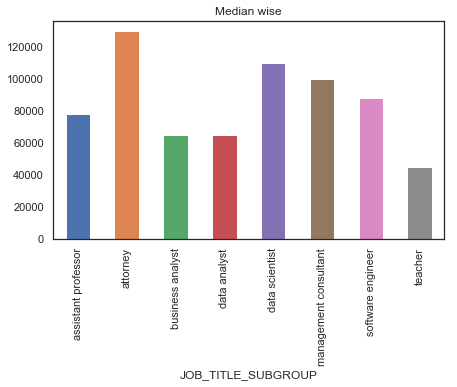

In [9]:
# Using grouping method as on standard pandas.plot method. 
# It was done as till now,I didnt know how to change 'estimator' arg. in seaborn barplot form mean to any other method
median_salary_group= salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].median()

# MEDIAN is the statistical method used to see variation
median_salary_job_plot = median_salary_group.plot('bar')
plt.title('Median wise')
plt.show()

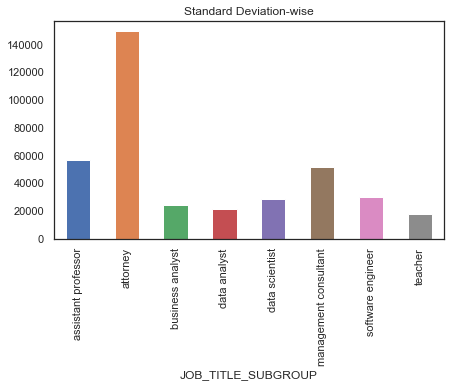

In [10]:
# Same reason as above.
stdev_salary_group=salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].std()

# STANDARD DEVIATION is the statistical method used to see variation
stdev_salary_job_plot= stdev_salary_group.plot('bar')
plt.title('Standard Deviation-wise')
plt.show()

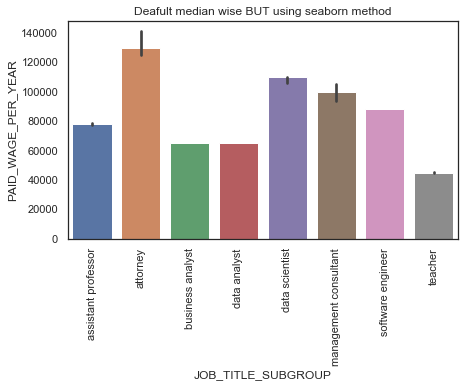

In [11]:
# as seen above plots we could see, we use df.plots methods for median or stdev plots, unable to manpiulate'estimator' arg in sns
# now, we can use numpy liberary fucntions to perform same analysis
'''ADVANTAGE
    1. Here, no need to group data and applying method prior'''

import numpy as np
median_salary_sns_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,estimator= np.median)
plt.xticks(rotation=90)
plt.title('Deafult median wise BUT using seaborn method')
plt.show()

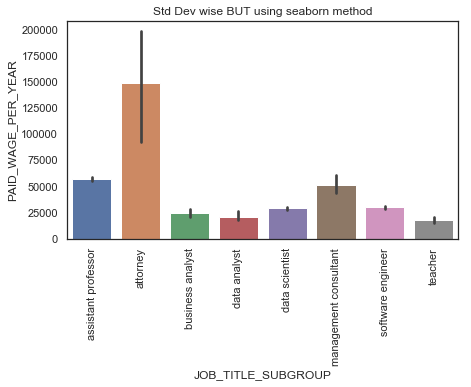

In [12]:
#
STD_salary_sns_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,estimator= np.std)
plt.xticks(rotation=90)
plt.title('Std Dev wise BUT using seaborn method')
plt.show()

In [ ]:
# same plot as above but using stdev computing
    

## VISA based job analysis

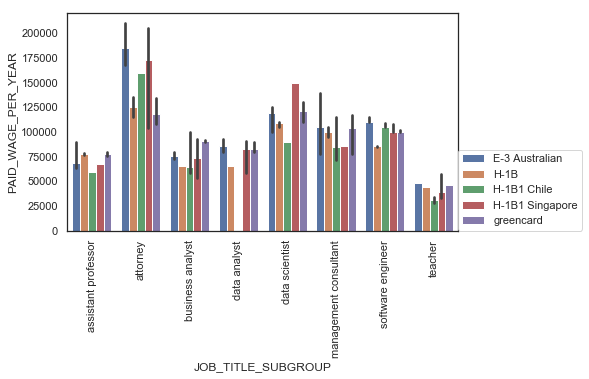

In [35]:
visa_job_bar = sns.barplot(x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,hue=salary.VISA_CLASS)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

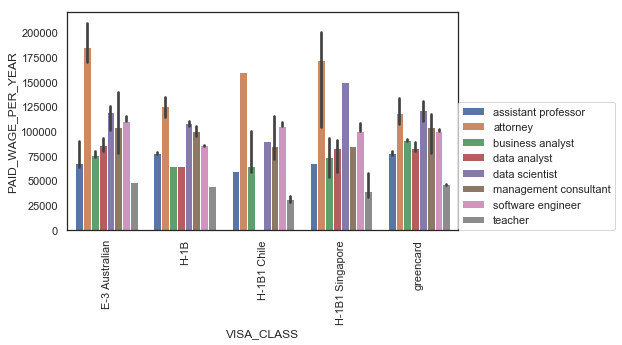

In [36]:
visa_job_bar1 = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,hue=salary.JOB_TITLE_SUBGROUP)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

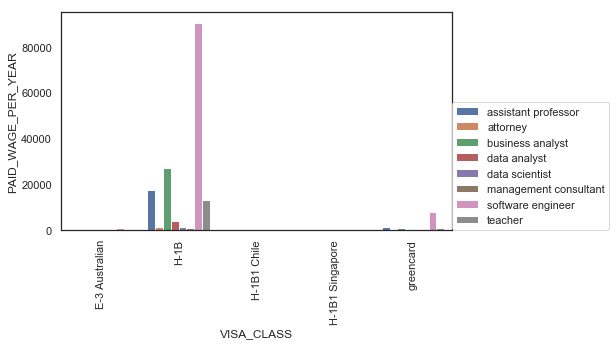

In [44]:
# this performs of counts of records per visa class
visa_job_count_bar = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=pd.Series.count,\
                                 hue=salary.JOB_TITLE_SUBGROUP)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

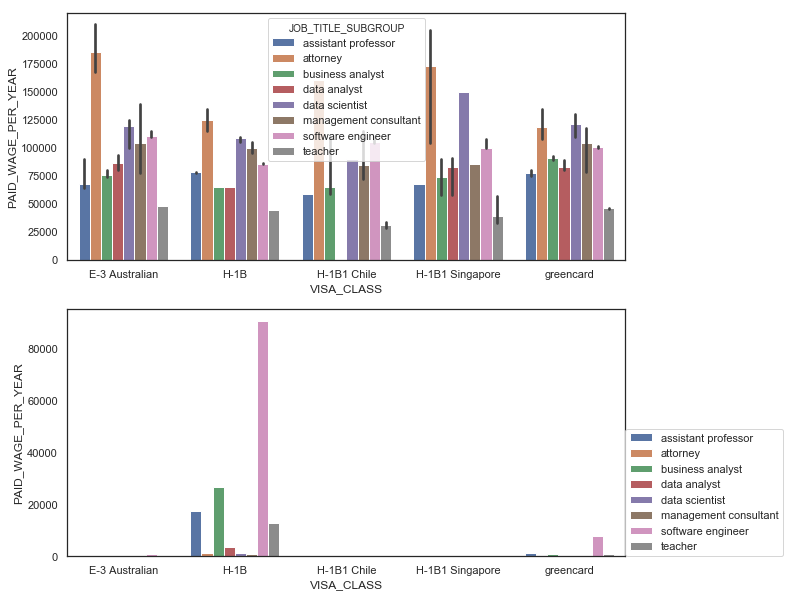

In [72]:
# using above tow graphs in subplots manner
f,axes= plt.subplots(2,1,figsize=(10,10),)

visa_job_bar1 = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,\
                            hue=salary.JOB_TITLE_SUBGROUP,ax=axes[0])
visa_job_count_bar = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=pd.Series.count\
                                 ,hue=salary.JOB_TITLE_SUBGROUP,ax=axes[1])

plt.legend(loc=(1,0))
plt.show()
f.savefig('subplot.jpeg',bbox_inch='Bbox')

---

## Testing block

### sorting data points

In [13]:
result = salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].aggregate(np.median).reset_index()\
                                                                              .sort_values('PAID_WAGE_PER_YEAR')

In [101]:
data_basics(result)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 7 to 1
Data columns (total 2 columns):
JOB_TITLE_SUBGROUP    8 non-null category
PAID_WAGE_PER_YEAR    8 non-null float64
dtypes: category(1), float64(1)
memory usage: 520.0 bytes
None




(    JOB_TITLE_SUBGROUP  PAID_WAGE_PER_YEAR
 7              teacher             44896.0
 2     business analyst             65000.0
 3         data analyst             65000.0
 0  assistant professor             78000.0
 6    software engineer             88275.2, None)

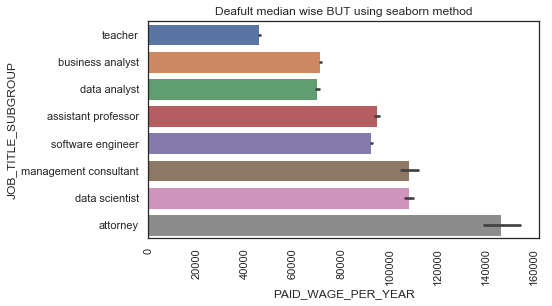

In [22]:
result_plot= sns.barplot(x=salary.PAID_WAGE_PER_YEAR,y=salary.JOB_TITLE_SUBGROUP,data=result,order=result['JOB_TITLE_SUBGROUP'])
plt.xticks(rotation=90)
plt.title('Deafult median wise BUT using seaborn method')
plt.show()
result_plot.figure.savefig('output.jpeg',bbox_inches='tight')

In [80]:
mean_salary_job_plot_pandas= salary.plot(kind='bar',y=salary.PAID_WAGE_PER_YEAR)
plt.xticks(rotation=90)
plt.title('Deafult mean wise')
plt.show()

KeyError: '[62171. 91440. 49470. ... 10920. 10608. 10504.] not in index'

In [113]:
result[['JOB_TITLE_SUBGROUP','PAID_WAGE_PER_YEAR']]

,JOB_TITLE_SUBGROUP,PAID_WAGE_PER_YEAR
7,teacher,44896.0
2,business analyst,65000.0
3,data analyst,65000.0
0,assistant professor,78000.0
6,software engineer,88275.2
5,management consultant,100000.0
4,data scientist,110000.0
1,attorney,130000.0


---

### BOX PLOTS

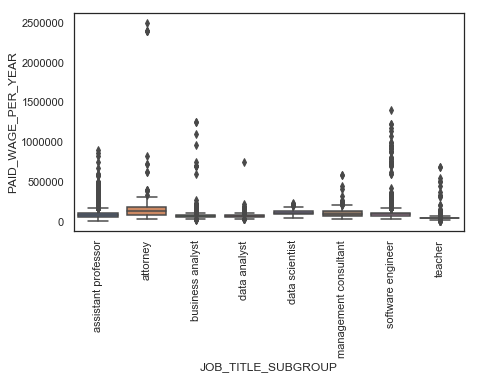

In [97]:
# PLotting BOXPLOT for above graph to identify presence of outlier
salary_job_boxplot= sns.boxplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,)
plt.xticks(rotation=90)
plt.show()

#### Here, we could see __attorney__ subgroup has relatively high outliers.To remove them there are two methods.
- By reducing the salary limits


In [95]:
salary1 = salary.loc[salary.PAID_WAGE_PER_YEAR<1500000,]

In [9]:
sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [10]:
graph= plt.bar(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,height=)

SyntaxError: invalid syntax (<ipython-input-10-bddc48e853a7>, line 1)

In [23]:
c=salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].value_counts().unstack().fillna(0)
c

PAID_WAGE_PER_YEAR,10500.0,10504.0,10608.0,10920.0,11648.0,12000.0,15100.8,15142.4,15425.279999999999,15600.0,...,1080000.0,1103711.73,1139001.0,1176000.0,1222788.0,1224800.6,1250784.0,1400000.0,2400000.0,2500000.0
JOB_TITLE_SUBGROUP,,,,,,,,,,,,,,,,,,,,,
assistant professor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
attorney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
business analyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
data analyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data scientist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
management consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
software engineer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
teacher,0.0,2.0,1.0,2.0,4.0,1.0,6.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


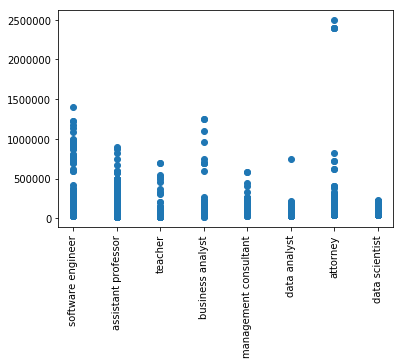

In [59]:
graph3 = plt.scatter(data=a,x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR)
plt.xticks(rotation=90)
plt.show()

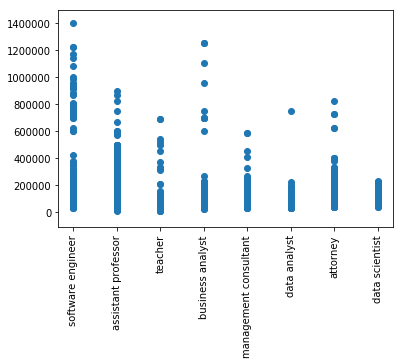

In [42]:
graph4 = plt.scatter(data=b,x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR)
plt.ylim(ymax=1500000)
plt.xticks(rotation=90)
plt.show()

In [41]:
salary.loc[(salary.JOB_TITLE_SUBGROUP=='attorney') & (salary.PAID_WAGE_PER_YEAR >1500000)]

,JOB_TITLE_SUBGROUP,JOB_TITLE,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,PAID_WAGE_PER_YEAR,FULL_TIME_POSITION_Y_N
160,attorney,ATTORNEY,207106.0,year,2400000.0,year,2400000.0,y
232,attorney,ASSOCIATE ATTORNEY,192379.0,year,2500000.0,year,2500000.0,y
266,attorney,ATTORNEY,188053.0,year,2400000.0,year,2400000.0,y
267,attorney,ATTORNEY,188053.0,year,2400000.0,year,2400000.0,y
268,attorney,ATTORNEY,188053.0,year,2400000.0,year,2400000.0,y


In [8]:
b= salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR']